In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("HousingData.csv")

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.fillna(df["LSTAT"].mean(), inplace=True)

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [11]:
X = df.drop("MEDV", axis=1)

In [12]:
y = df["MEDV"]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X = scaler.fit_transform(X)

In [16]:
X

array([[-0.45476415,  0.29382364, -1.31915844, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.45235694, -0.49219348, -0.60871984, ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.45235924, -0.49219348, -0.60871984, ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.44852077, -0.49219348,  0.11664393, ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.44292077, -0.49219348,  0.11664393, ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.4500518 , -0.49219348,  0.11664393, ...,  1.17646583,
         0.44105193, -0.69020355]])

In [1]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(339, 13)

In [20]:
y_train.shape

(339,)

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers import Dense,Dropout

In [24]:
model=Sequential()

In [25]:
model.add(Dense(64,input_dim=13, activation="relu"))

In [26]:
model.add(Dropout(0.2))

In [27]:
model.add(Dense(32,activation="relu"))

In [28]:
model.add(Dense(1))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 64) dtype=float32, numpy=
 array([[ 0.08979234,  0.05542994, -0.04235959, -0.07427329, -0.23229706,
          0.18895635,  0.19778278, -0.08310379,  0.04035527,  0.16638482,
         -0.03446715, -0.15491846, -0.11265917,  0.0758906 ,  0.12985131,
         -0.19689949, -0.01606944,  0.18738228, -0.2267431 , -0.01195386,
         -0.08740801,  0.04499915, -0.22548538,  0.14017835,  0.08342251,
          0.05826133, -0.20721301,  0.12498394, -0.13587233,  0.09067717,
         -0.07391043, -0.12441748, -0.08228086, -0.04495171,  0.27213868,
         -0.17407852,  0.02968735, -0.16529155, -0.07770412,  0.07544643,
         -0.12873821,  0.05812049,  0.17999685, -0.2624125 , -0.03647999,
          0.18983504, -0.17811811,  0.22122481, -0.06095082, -0.06387211,
          0.10866934, -0.23411795,  0.10295054, -0.14951332, -0.11864045,
         -0.17853028,  0.26328292, -0.16662899,  0.22408572,  0.0193522 ,
         -0.18751693, -0.23432142,  0.087052

In [36]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mean_absolute_error"])

In [38]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=25,batch_size=32)

Epoch 1/25
9/9 [==============================] - 0s 15ms/step - loss: 30.1640 - mean_absolute_error: 4.1723 - val_loss: 32.8732 - val_mean_absolute_error: 3.7575
Epoch 2/25
9/9 [==============================] - 0s 9ms/step - loss: 27.1153 - mean_absolute_error: 3.8911 - val_loss: 32.2827 - val_mean_absolute_error: 3.7166
Epoch 3/25
9/9 [==============================] - 0s 9ms/step - loss: 31.1181 - mean_absolute_error: 4.0638 - val_loss: 31.7716 - val_mean_absolute_error: 3.7220
Epoch 4/25
9/9 [==============================] - 0s 9ms/step - loss: 33.5274 - mean_absolute_error: 4.2485 - val_loss: 31.4832 - val_mean_absolute_error: 3.6976
Epoch 5/25
9/9 [==============================] - 0s 11ms/step - loss: 31.1997 - mean_absolute_error: 4.1147 - val_loss: 31.2218 - val_mean_absolute_error: 3.6613
Epoch 6/25
9/9 [==============================] - 0s 13ms/step - loss: 28.3026 - mean_absolute_error: 4.0359 - val_loss: 30.5137 - val_mean_absolute_error: 3.5957
Epoch 7/25
9/9 [=========

In [39]:
import matplotlib.pyplot as plt

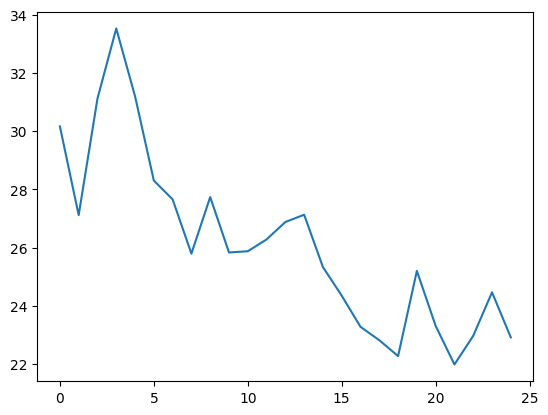

In [40]:
plt.plot(history.history["loss"])

In [2]:
import numpy as np

In [3]:
from keras.datasets import imdb

In [4]:
from keras.utils import pad_sequences

In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Bidirectional,LSTM,Dense,Embedding

In [7]:
(X_train, y_train),(X_test,y_test)= imdb.load_data()

In [8]:
max_len=250

In [9]:
X_train =pad_sequences(X_train,maxlen=max_len)

In [10]:
X_test= pad_sequences(X_test,maxlen=max_len)

In [11]:
model= Sequential()

In [12]:
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_len))

In [13]:
model.add(Bidirectional(LSTM(64, return_sequences=True)))

In [14]:
model.add(Bidirectional(LSTM(32)))

In [15]:
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=128)

Epoch 1/50
 98/157 [=================>............] - ETA: 6s - loss: 0.5107 - accuracy: 0.7370

KeyboardInterrupt: 

In [58]:
loss,acc= model.evaluate(X_test,y_test,batch_size=128)

196/196 [==============================] - 6s 28ms/step - loss: 0.9629 - accuracy: 0.8422


In [60]:
loss

0.9628956913948059

In [61]:
acc

0.8422399759292603

In [62]:
import tensorflow as tf

In [63]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt

In [67]:
from keras.layers import Dense,Flatten

In [68]:
from keras.datasets import fashion_mnist

In [70]:
fashion_mnist = fashion_mnist

In [71]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [72]:
X_train=X_train/255.0

In [73]:
X_test = X_test/255.0

In [74]:
model=Sequential()

In [76]:
model.add(Flatten(input_shape=(28,28)))

In [77]:
model.add(Dense(128,activation="relu"))

In [78]:
model.add(Dense(10,activation="softmax"))

In [83]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [84]:
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5023 - accuracy: 0.8247
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8641
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8757
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8832
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8915
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8952
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9011
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9054
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2481 - accuracy: 0.9078
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [85]:
loss,acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.8877


In [86]:
loss

0.4145823121070862

In [87]:
acc

0.8877000212669373

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [18]:
df = pd.read_csv("HousingData.csv")

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [20]:
df.fillna(df['LSTAT'].mean(),inplace=True)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X= df.drop("MEDV",axis=1)

In [23]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [24]:
y = df["MEDV"]

In [25]:
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(339, 13)

In [31]:
y_train.shape

(339,)

In [39]:
from keras.layers import Dense,Dropout

In [34]:
from keras.models import Sequential

In [35]:
model = Sequential()

In [36]:
model.add(Dense(64,input_dim=13,activation="relu"))

In [40]:
model.add(Dropout(0.2))

In [41]:
model.add(Dense(32,activation="relu"))

In [42]:
model.add(Dense(1))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mean_absolute_error"])

In [50]:
history=model.fit(X,y,epochs=100,validation_split=0.2,batch_size=64)

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 17.8647 - mean_absolute_error: 3.1713 - val_loss: 29.3591 - val_mean_absolute_error: 4.2932
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 19.9179 - mean_absolute_error: 3.2137 - val_loss: 30.2275 - val_mean_absolute_error: 4.3544
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 18.4857 - mean_absolute_error: 3.1810 - val_loss: 29.0639 - val_mean_absolute_error: 4.2671
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 18.3030 - mean_absolute_error: 3.0039 - val_loss: 28.0300 - val_mean_absolute_error: 4.1834
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 15.8294 - mean_absolute_error: 2.9903 - val_loss: 28.1977 - val_mean_absolute_error: 4.1948
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 18.1149 - mean_absolute_error: 3.1375 - val_loss: 28.7985 - val_mean_absolute_error: 4.2420
Epoch 7/100
7/7 

Epoch 51/100
7/7 [==============================] - 0s 11ms/step - loss: 14.0309 - mean_absolute_error: 2.7397 - val_loss: 34.7859 - val_mean_absolute_error: 4.6168
Epoch 52/100
7/7 [==============================] - 0s 12ms/step - loss: 14.6380 - mean_absolute_error: 2.8346 - val_loss: 33.8823 - val_mean_absolute_error: 4.5541
Epoch 53/100
7/7 [==============================] - 0s 12ms/step - loss: 14.3389 - mean_absolute_error: 2.8692 - val_loss: 33.9419 - val_mean_absolute_error: 4.5606
Epoch 54/100
7/7 [==============================] - 0s 11ms/step - loss: 16.3086 - mean_absolute_error: 2.9765 - val_loss: 35.1648 - val_mean_absolute_error: 4.6508
Epoch 55/100
7/7 [==============================] - 0s 11ms/step - loss: 14.9276 - mean_absolute_error: 2.9009 - val_loss: 34.5381 - val_mean_absolute_error: 4.6038
Epoch 56/100
7/7 [==============================] - 0s 11ms/step - loss: 14.6757 - mean_absolute_error: 2.7769 - val_loss: 34.6075 - val_mean_absolute_error: 4.6096
Epoch 57/1

In [51]:
import matplotlib.pyplot as plt

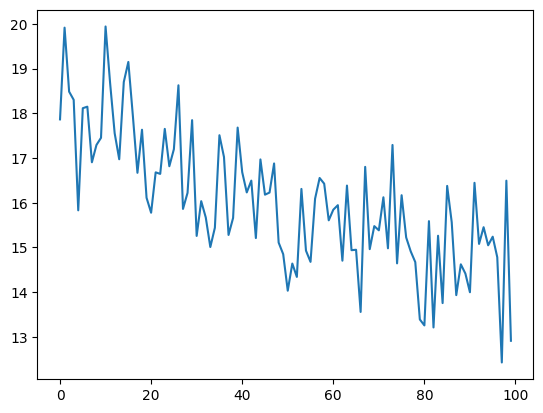

In [55]:
plt.plot(history.history["loss"])

In [56]:
from keras import __version__

In [57]:
__version__

'2.10.0'

In [1]:
from tensorflow import __version__
__version__

'2.10.0'

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [12]:
df = pd.read_csv("HousingData.csv")

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
df.fillna(df['LSTAT'].mean(),inplace=True)

In [15]:
X = df.drop("MEDV",axis=1)

In [16]:
y = df["MEDV"]

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X = scaler.fit_transform(X)

In [20]:
X

array([[-0.45476415,  0.29382364, -1.31915844, ..., -1.45900038,
         0.44105193, -1.10414593],
       [-0.45235694, -0.49219348, -0.60871984, ..., -0.30309415,
         0.44105193, -0.51035272],
       [-0.45235924, -0.49219348, -0.60871984, ..., -0.30309415,
         0.39642699, -1.23974774],
       ...,
       [-0.44852077, -0.49219348,  0.11664393, ...,  1.17646583,
         0.44105193, -1.00993835],
       [-0.44292077, -0.49219348,  0.11664393, ...,  1.17646583,
         0.4032249 , -0.8900378 ],
       [-0.4500518 , -0.49219348,  0.11664393, ...,  1.17646583,
         0.44105193, -0.69020355]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from keras.models import Sequential

In [24]:
from keras.layers import Dense, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Dense(64,activation="relu",input_dim=13))

In [37]:
model.add(Dropout(0.2))

In [38]:
model.add(Dense(32,activation="relu"))

In [39]:
model.add(Dense(1))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss="mean_squared_error",metrics=["mean_absolute_error"],optimizer="adam")

In [42]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,batch_size=128)

Epoch 1/50
3/3 [==============================] - 0s 58ms/step - loss: 614.9851 - mean_absolute_error: 22.8608 - val_loss: 579.9404 - val_mean_absolute_error: 22.5202
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 607.1904 - mean_absolute_error: 22.6861 - val_loss: 571.7429 - val_mean_absolute_error: 22.3375
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 597.3245 - mean_absolute_error: 22.4770 - val_loss: 563.6880 - val_mean_absolute_error: 22.1550
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 587.9432 - mean_absolute_error: 22.2573 - val_loss: 555.5701 - val_mean_absolute_error: 21.9686
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 580.7946 - mean_absolute_error: 22.0854 - val_loss: 547.2973 - val_mean_absolute_error: 21.7777
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 572.0992 - mean_absolute_error: 21.8890 - val_loss: 538.8554 - val_mean_absolute_error: 21.580

3/3 [==============================] - 0s 19ms/step - loss: 48.6764 - mean_absolute_error: 5.1426 - val_loss: 43.1600 - val_mean_absolute_error: 4.5394


In [43]:
import matplotlib.pyplot as plt

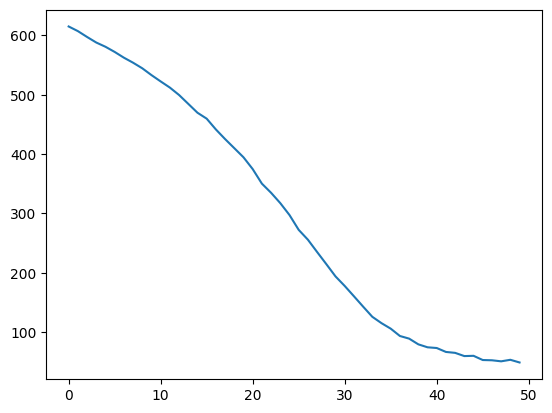

In [44]:
plt.plot(history.history["loss"])